✅ Data loaded successfully. Shape: (569, 33)
✅ Cleaned Data Shape: (569, 31)

✅ Accuracy: 0.9649122807017544

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



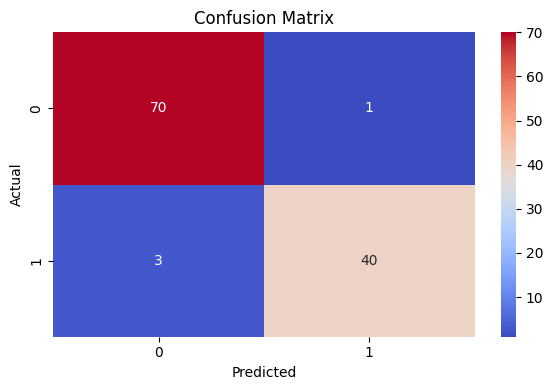

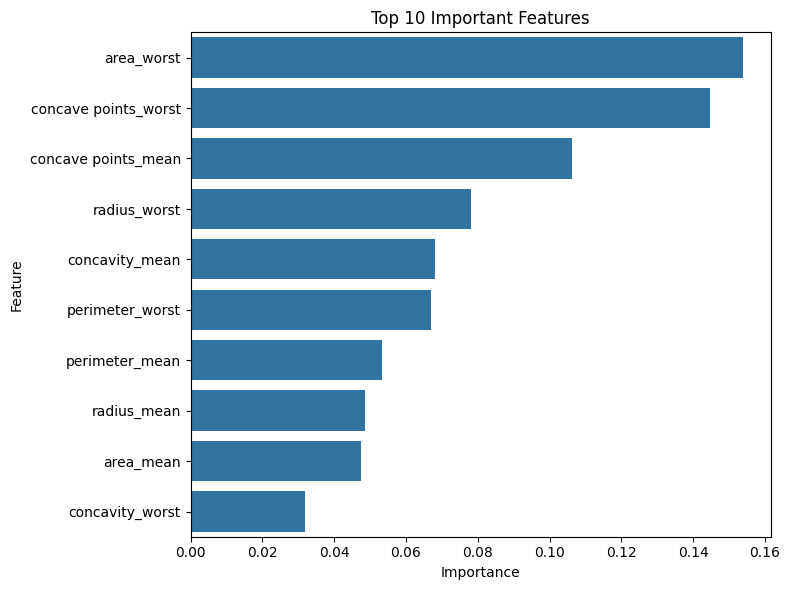

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/3. Predict Disease Outcome Based on Genetic and Clinical Data.csv")
print("✅ Data loaded successfully. Shape:", df.shape)

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')

# Target column is 'diagnosis'
target_col = 'diagnosis'

# Check and drop nulls
df = df.dropna()
print("✅ Cleaned Data Shape:", df.shape)

# Encode target column (B/M → 0/1)
df[target_col] = LabelEncoder().fit_transform(df[target_col])  # B=0, M=1

# Feature & Target Split
X = df.drop(columns=[target_col])
y = df[target_col]

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the Model
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature Importance
importances = model.feature_importances_
feat_names = X.columns
imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df.head(10))
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()
